## **Оглавление:**
- [Шаг 1. Откроем файлы с данными и изучим общую информацию](#id-section1)<a class='anchor' id='id-section17'/>
- [Вывод](#id-section2)<a class='anchor' id='id-section18'/>


- [Шаг 2. Подготовим данные к анализу](#id-section3)<a class='anchor' id='id-section19'/>
- [Приведем данные к нужному типу](#id-section4)<a class='anchor' id='id-section20'/>
- [Обработаем дубликаты](#id-section5)<a class='anchor' id='id-section21'/>
- [Вывод](#id-section6)<a class='anchor' id='id-section22'/>


- [Шаг 3. Выберем топ-10 городов по количеству рейсов](#id-section7)<a class='anchor' id='id-section23'/>
- [Вывод](#id-section8)<a class='anchor' id='id-section24'/>


- [Шаг 4. Построим графики](#id-section9)<a class='anchor' id='id-section25'/>
- [График "Модели самолетов и количество рейсов"](#id-section10)<a class='anchor' id='id-section26'/>
- [График "Города и количество рейсов"](#id-section11)<a class='anchor' id='id-section27'/>
- [График "Топ-10 городов и количество рейсов"](#id-section12)<a class='anchor' id='id-section28'/>


- [Шаг 5. Выводы по графикам](#id-section13)<a class='anchor' id='id-section29'/>
- [Выводы по графику "Модели самолетов и количество рейсов"](#id-section14)<a class='anchor' id='id-section30'/>
- [Выводы по графику "Города и количество рейсов"](#id-section15)<a class='anchor' id='id-section31'/>
- [Выводы по графику "Топ-10 городов и количество рейсов"](#id-section16)<a class='anchor' id='id-section32'/>

<a class='anchor' id='id-section1'/>

## [Шаг 1. Откроем файлы с данными и изучим общую информацию](#id-section17)

Методы `head()` и `tail()` применять не будем, потому что Jupyter и так выведет на экран первые и последние 5 строк из длинных таблиц.

Также сразу посмотрим, какие типы данных хранятся в таблицах, воспользуемся методом `info()`.

In [1]:
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt 

plain = pd.read_csv('/datasets/query_1.csv')
city = pd.read_csv('/datasets/query_3.csv')

tables = [plain, city]
for table in tables:
    display(table)
    table.info()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


<a class='anchor' id='id-section2'/>

### [Вывод](#id-section18)

Таблица `plain` - это небольшой массив данных, в нем хранится лишь 8 строк, что логично, так как существует ограниченное количество моделей самолетов для пассажирских авиаперевозок. Пропущенных значений в таблице нет. Категориальная переменная `model` имеет тип данных `object`, а количественная переменная `flights_amount` - целочисленный тип `int64` - это корректно.

Таблица `city` - более объемный массив данных, в ней почти 100 строк с городами. Пропущенных значений в таблице нет. Категориальная переменная `city` имеет тип данных `object` (корректно), а количественная переменная `average_flights` - дробный тип `float64`. Возможно, для более удобного отображения на графиках и таблицах, нам стоит округлить данные до 1 знака после запятой.

<a class='anchor' id='id-section3'/>

## [Шаг 2. Подготовим данные к анализу](#id-section19)

<a class='anchor' id='id-section4'/>

### [Приведем данные к нужному типу](#id-section20)

Мы приняли решение о том, что для удобства значения в переменной `average_flights` из таблицы `city` должны быть округлены до 1 знака после запятой. 
Применим к столбцу функцию `round()` с параметром `decimals=1` и проверим.

In [2]:
city['average_flights'] = city['average_flights'].round(decimals=1)
display(city.head())

,city,average_flights
0,Абакан,3.9
1,Анадырь,1.0
2,Анапа,2.2
3,Архангельск,5.4
4,Астрахань,2.5


<a class='anchor' id='id-section5'/>

### [Обработаем дубликаты](#id-section21)

На всякий случай поищем дубликаты в большой таблице `city` методом `duplicated().sum()`, что позволит нам посчитать общее количество дубликатов в таблице.

In [3]:
display(city.duplicated().sum())

0

<a class='anchor' id='id-section6'/>

### [Вывод](#id-section22)

На данном этапе мы:
- перевели значения переменной `average_flights` таблицы `city` к удобному типу;
- убедились, что дубликаты в таблице `city` отсутствуют.

<a class='anchor' id='id-section7'/>

## [Шаг 3. Выберем топ-10 городов по количеству рейсов](#id-section23)

Для этого отсортируем таблицу `city` методом `sort_values()` по столбцу `average_flights` по убыванию (параметр `ascending = False`) и оставим первые 10 строк методом `head(10)`.

In [4]:
top_10_city = city.sort_values(by = 'average_flights', ascending = False).head(10)
display(top_10_city)

,city,average_flights
43,Москва,129.8
70,Санкт-Петербург,31.2
54,Новосибирск,17.3
33,Красноярск,11.6
20,Екатеринбург,11.3
67,Ростов-на-Дону,10.2
63,Пермь,10.1
10,Брянск,10.0
74,Сочи,9.6
84,Ульяновск,9.6


<a class='anchor' id='id-section8'/>

### [Вывод](#id-section24)

Топ-10 городов сформирован. Больше всего рейсов за день в августе 2018 г. прибыло в Москву, Санкт-Петербург и Новосибирск. Остальные города из топ-10 принимали в среднем от 11.6 до 9.6 рейсов в день. 

<a class='anchor' id='id-section9'/>

## [Шаг 4. Построим графики](#id-section25)

<a class='anchor' id='id-section10'/>

### [График "Модели самолетов и количество рейсов"](#id-section26)

Сгруппируем таблицу `plain` по моделям (чтобы модели оказались в индесах) и для каждой модели посчитаем суммарное количество рейсов методом `sum()`. Отсортируем значения через `sort_values()`. Учитывая то, что график будет построен методом `plot()` с типом `barh`, сортировка в результате будет произведена по убыванию, и мы получим удобный график.

<a class='anchor' id='id-section11'/>

### [График "Города и количество рейсов"](#id-section27)

Принцип построения графика тот же, только таблица для графика `city` сгруппирована по городам (чтобы города оказались в индесах) и для каждого города посчитано суммарное количество рейсов методом `sum()`. Для наглядности мы также отсортируем значения методом `sort_values()`.

<a class='anchor' id='id-section12'/>

### [График "Топ-10 городов и количество рейсов"](#id-section28)

Принципы построения графика и формирования таблицы те же. Для того, чтобы взять топ-10 городов, мы делаем срез из таблицы `city` таким образом, чтобы в столбце с городами оказались города из внешней переменной `top_10_city`. 

*Если бы внешней переменной `top_10_city` не было, мы просто повторили бы предыдущий график и взяли 10 самых больших значений методом `tail(10)` (`не head(10)`, так как тип графика `barh`) по результатам сортировки. И результат был бы тем же.*

**Выведем сразу 3 графика** методом `subplots()`.

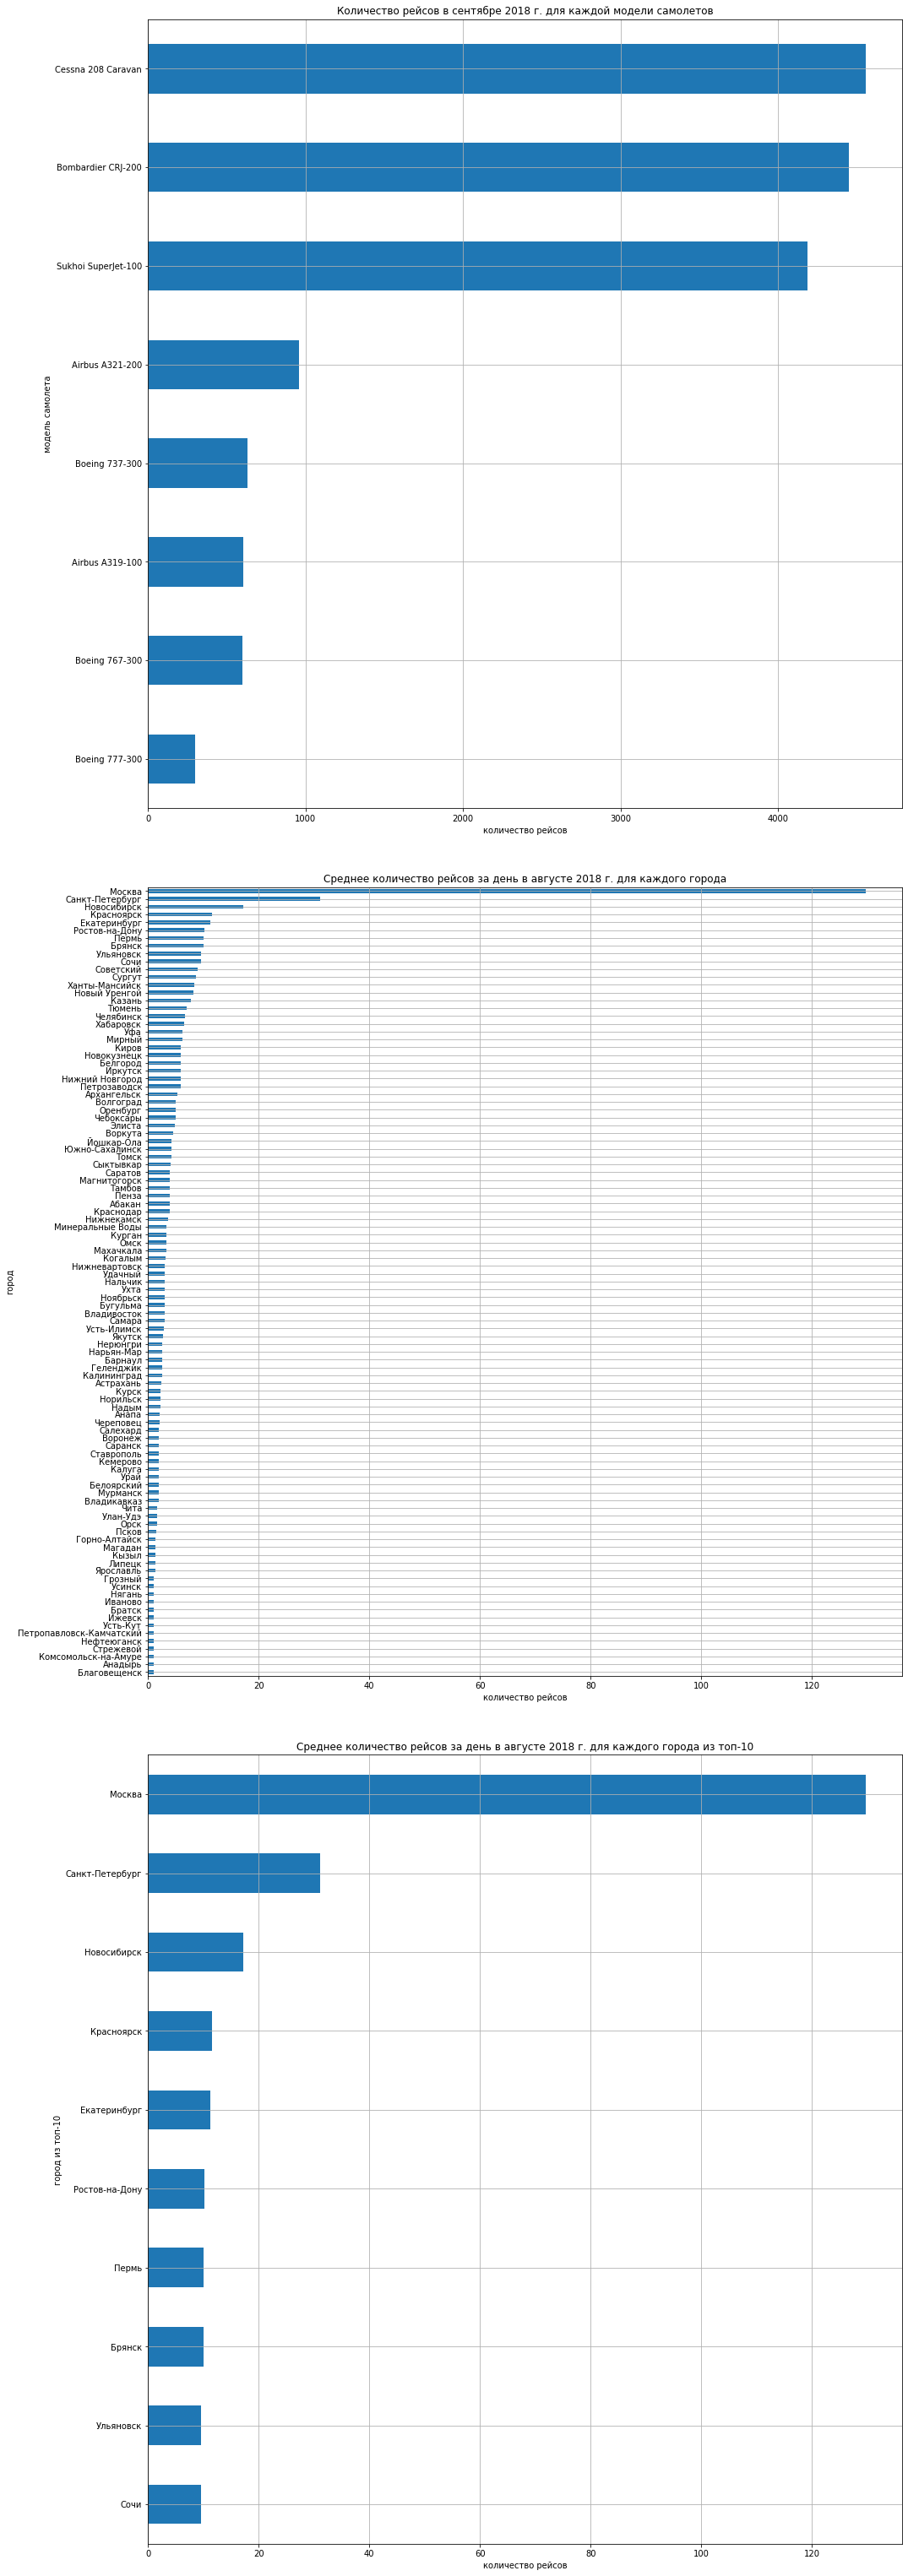

In [5]:
fig, (a, b, c) = plt.subplots(3, 1, figsize=(16, 55))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

plain.groupby('model')['flights_amount'].sum().sort_values()\
.plot(kind = 'barh', title = 'Количество рейсов в сентябре 2018 г. для каждой модели самолетов', \
      grid = True, ax = a)
a.set_xlabel('количество рейсов')
a.set_ylabel('модель самолета')

city.groupby('city')['average_flights'].sum().sort_values()\
.plot(kind = 'barh', title = 'Среднее количество рейсов за день в августе 2018 г. для каждого города', \
      grid = True, ax = b)
b.set_xlabel('количество рейсов')
b.set_ylabel('город')

city.query('city in @top_10_city.city').groupby('city')['average_flights'].sum().sort_values()\
.plot(kind = 'barh', title = 'Среднее количество рейсов за день в августе 2018 г. для каждого города из топ-10', \
      grid = True, ax = c)
c.set_xlabel('количество рейсов')
c.set_ylabel('город из топ-10')

plt.show()

<a class='anchor' id='id-section13'/>

## [Шаг 5. Выводы по графикам](#id-section29)

<a class='anchor' id='id-section14'/>

### [Выводы по графику "Модели самолетов и количество рейсов"](#id-section30)

На первом графике "Количество рейсов в сентябре 2018 г. для каждой модели самолетов" мы видим, что:
- больше всего рейсов совершил самолет модели Cessna 208 Caravan. Это очень маленький самолет, пассажирский салон которого вмещает 9-13 кресел;
- на втором месте самолет Bombardier CRJ-200 - это самолет немного побольше, в его пассажирском салоне располагается 50 кресел;
- на третьем месте самолет Sukhoi SuperJet-100 с количеством мест 95-98 кресел;
- самолеты-гиганты, например, Boeing 777-300 (на 550 мест), Boeing 767-300 (на 328 мест), Airbus A321 (на 220-236 мест) совершили гораздо меньшее число рейсов, по сравнению с тройкой лидеров.

График свидетельствует о том, что для внутренних пассажирских авиаперевозок достаточно небольших самолетов с вместимостью не более 100 мест. Возможно, это связано с тем, что для поездок люди часто предпочитают альтернативные и более дешевые виды транспорта (автомобиль, автобус, поезд), а также с тем, что в городах небольшая плотность населения, нет спроса на билеты, и количество пассажиров для заполнения огромных самолетов просто не набирается.

<a class='anchor' id='id-section15'/>

### [Выводы по графику "Города и количество рейсов"](#id-section31)

На втором графике "Среднее количество рейсов за день в августе 2018 г. для каждого города" мы видим, что:
- лидирующую позицию занимает Москва, политический, экономический и культурный центр страны;
- далее идет Санкт-Петербург, который тоже имеет большое значение для государства как в области экономики, политики, так и в туристической сфере;
- меньше всего рейсов в день было совершено в Благовещенск, Анадырь, Комсомольск-на-Амуре, Стрежевой, Нефтеюганск, Петропавловск-Камчатский и остальные города. 

Мы полагаем, это связано с тем, что в городах, расположенных на Камчатке, Чукотке, в Хабаровском крае, Амурской области не всегда можно наладить регулярное и частое авиасообщение по причине неблагоприятных погодных условий. В остальных городах маленькое количество рейсов может быть связано с тем, что существуют альтернативные виды транспорта (автобусы, поезда), по причине чего спрос на авиабилеты низкий и рейсов мало.

<a class='anchor' id='id-section16'/>

### [Выводы по графику "Топ-10 городов и количество рейсов"](#id-section32)

На третьем графике "Среднее количество рейсов за день в августе 2018 г. для каждого города из топ-10" мы можем подробнее изучить позиции 10 городов, в которые выполняется больше всего рейсов за день:
- в лидерах Москва и Санкт-Петербург, о них мы уже упоминали выше;
- остальные города, попавшие в топ-10, являются миллионниками, а также крупными административными и экономическими центрами. Каждый из этих городов является центром для своей административно-территориальной единицы;
- Сочи, хоть и не является городом-миллионником, попал в топ-10 по причине того, что это популярный туристический город. График показывает количество рейсов в августе 2018 г. - а это очень востребованное время для отпуска на море. Мы также можем сделать предположение о том, что Сочи даже в зимние месяцы не потеряет свои позиции, так как зимой этот город становится популярным горнолыжным курортом.